In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
from scipy.ndimage import binary_dilation
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image
from dataloader.dresscode.dataloader import DataLoader as DressCode_DataLoader
from dataloader.dresscode.dataset import Dataset as DressCode_Dataset
from concurrent.futures import ProcessPoolExecutor

In [2]:
from dataclasses import dataclass

@dataclass
class Args:
    exp_name: str = None
    category: str = "dress"
    dataroot: str = Exception()
    data_pairs: str = "{}_pairs"
    checkpoint_dir: str = ""
    batch_size: int = 1
    workers: int = 0
    epochs: int = 150
    step: int = 100000
    display_count: int = 1000
    shuffle: bool = True
    height: int = 512
    width: int = 384
    radius: int = 5
    

args = Args(dataroot="../datasets/DressCode")

In [3]:
os.listdir("../datasets/DressCode/dresses/agnostic_masks")[:4]

['047764_0.png', '038032_0.png', '042522_0.png', '052998_0.png']

In [3]:
dataset_train = DressCode_Dataset(args, 
                        dataroot_path=args.dataroot, 
                        category=["dresses"],
                        phase='train',
                        order='paired',
                        size=(int(args.height), int(args.width)))

# dataloader_train = DressCode_DataLoader(args, dataset_train, dist_sampler=False)

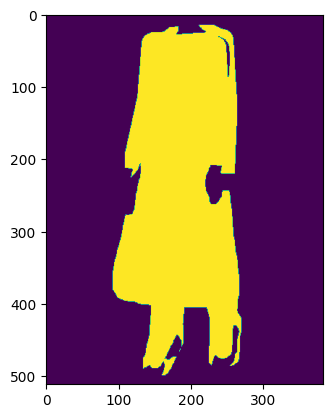

In [6]:
for i in range(len(dataset_train)):
    mask_ground_truth = dataset_train[i]["person_mask"]
    plt.imshow(mask_ground_truth)
    break
plt.show()

In [5]:
padding = 20

def preprocess(i):
    sample = dataset_train[i]

    img_name = sample["im_name"]

    mask_raw = sample["person_mask"]
    
    mask_ground_truth = sample["cloth_mask"]
    
    mask_ground_truth = binary_dilation(mask_ground_truth, structure=np.ones((padding, padding)))

    matplotlib.image.imsave(os.path.join(args.dataroot, "dresses", "mask_raw", img_name), mask_raw, cmap='gray')
    
    matplotlib.image.imsave(os.path.join(args.dataroot, "dresses", "mask_ground_truth", img_name), mask_ground_truth, cmap='gray')

with ProcessPoolExecutor(max_workers=4) as executor:
    p = executor.map(preprocess, range(len(dataset_train)))

In [6]:
dataset_train = DressCode_Dataset(args, 
                        dataroot_path=args.dataroot, 
                        category=["lower_body"],
                        phase='train',
                        order='paired',
                        size=(int(args.height), int(args.width)))

padding = 20

def preprocess(i):
    sample = dataset_train[i]

    img_name = sample["im_name"]

    mask_raw = sample["person_mask"]
    
    mask_ground_truth = sample["cloth_mask"]
    
    mask_ground_truth = binary_dilation(mask_ground_truth, structure=np.ones((padding, padding)))

    matplotlib.image.imsave(os.path.join(args.dataroot, "lower_body", "mask_raw", img_name), mask_raw, cmap='gray')
    
    matplotlib.image.imsave(os.path.join(args.dataroot, "lower_body", "mask_ground_truth", img_name), mask_ground_truth, cmap='gray')

with ProcessPoolExecutor(max_workers=4) as executor:
    p = executor.map(preprocess, range(len(dataset_train)))

In [7]:
dataset_train = DressCode_Dataset(args, 
                        dataroot_path=args.dataroot, 
                        category=["upper_body"],
                        phase='train',
                        order='paired',
                        size=(int(args.height), int(args.width)))

padding = 20

def preprocess(i):
    sample = dataset_train[i]

    img_name = sample["im_name"]

    mask_raw = sample["person_mask"]
    
    mask_ground_truth = sample["cloth_mask"]
    
    mask_ground_truth = binary_dilation(mask_ground_truth, structure=np.ones((padding, padding)))

    matplotlib.image.imsave(os.path.join(args.dataroot, "upper_body", "mask_raw", img_name), mask_raw, cmap='gray')
    
    matplotlib.image.imsave(os.path.join(args.dataroot, "upper_body", "mask_ground_truth", img_name), mask_ground_truth, cmap='gray')

with ProcessPoolExecutor(max_workers=4) as executor:
    p = executor.map(preprocess, range(len(dataset_train)))

In [8]:
len(os.listdir("../datasets/DressCode/dresses/mask_raw"))

27679

In [11]:
category = "dresses"

dataset = DressCode_Dataset(args, 
                        dataroot_path=args.dataroot, 
                        category=[category],
                        phase='test',
                        order='paired',
                        size=(int(args.height), int(args.width)))

padding = 20

def preprocess(i):
    sample = dataset[i]

    img_name = sample["im_name"]

    mask_raw = sample["person_mask"]
    
    mask_ground_truth = sample["cloth_mask"]
    
    mask_ground_truth = binary_dilation(mask_ground_truth, structure=np.ones((padding, padding)))

    matplotlib.image.imsave(os.path.join(args.dataroot, category, "mask_raw", img_name), mask_raw, cmap='gray')
    
    matplotlib.image.imsave(os.path.join(args.dataroot, category, "mask_ground_truth", img_name), mask_ground_truth, cmap='gray')

with ProcessPoolExecutor(max_workers=4) as executor:
    p = executor.map(preprocess, range(len(dataset)))

In [12]:
len(os.listdir("../datasets/DressCode/dresses/mask_raw"))

29479

In [13]:
len(os.listdir("../datasets/DressCode/lower_body/mask_raw"))

7152

In [14]:
category = "lower_body"

dataset = DressCode_Dataset(args, 
                        dataroot_path=args.dataroot, 
                        category=[category],
                        phase='test',
                        order='paired',
                        size=(int(args.height), int(args.width)))

padding = 20

def preprocess(i):
    sample = dataset[i]

    img_name = sample["im_name"]

    mask_raw = sample["person_mask"]
    
    mask_ground_truth = sample["cloth_mask"]
    
    mask_ground_truth = binary_dilation(mask_ground_truth, structure=np.ones((padding, padding)))

    matplotlib.image.imsave(os.path.join(args.dataroot, category, "mask_raw", img_name), mask_raw, cmap='gray')
    
    matplotlib.image.imsave(os.path.join(args.dataroot, category, "mask_ground_truth", img_name), mask_ground_truth, cmap='gray')

with ProcessPoolExecutor(max_workers=4) as executor:
    p = executor.map(preprocess, range(len(dataset)))

In [15]:
len(os.listdir("../datasets/DressCode/lower_body/mask_raw"))

8952

In [16]:
len(os.listdir("../datasets/DressCode/upper_body/mask_raw"))

13563

In [17]:
category = "upper_body"

dataset = DressCode_Dataset(args, 
                        dataroot_path=args.dataroot, 
                        category=[category],
                        phase='test',
                        order='paired',
                        size=(int(args.height), int(args.width)))

padding = 20

def preprocess(i):
    sample = dataset[i]

    img_name = sample["im_name"]

    mask_raw = sample["person_mask"]
    
    mask_ground_truth = sample["cloth_mask"]
    
    mask_ground_truth = binary_dilation(mask_ground_truth, structure=np.ones((padding, padding)))

    matplotlib.image.imsave(os.path.join(args.dataroot, category, "mask_raw", img_name), mask_raw, cmap='gray')
    
    matplotlib.image.imsave(os.path.join(args.dataroot, category, "mask_ground_truth", img_name), mask_ground_truth, cmap='gray')

with ProcessPoolExecutor(max_workers=4) as executor:
    p = executor.map(preprocess, range(len(dataset)))

In [18]:
len(os.listdir("../datasets/DressCode/upper_body/mask_raw"))

15363

agnostic_densepose

In [ ]:
category = "dresses"

dataset = DressCode_Dataset(args, 
                        dataroot_path=args.dataroot, 
                        category=[category],
                        phase='train',
                        order='paired',
                        size=(int(args.height), int(args.width)))

padding = 20

def preprocess(i):
    sample = dataset[i]

    img_name = sample["im_name"]

    agnostic_densepose = sample['parse_mask_total']
    
    matplotlib.image.imsave(os.path.join(args.dataroot, category, "agnostic_densepose", img_name), agnostic_densepose)
    
with ProcessPoolExecutor(max_workers=4) as executor:
    p = executor.map(preprocess, range(len(dataset)))

In [ ]:
category = "lower_body"

dataset = DressCode_Dataset(args, 
                        dataroot_path=args.dataroot, 
                        category=[category],
                        phase='train',
                        order='paired',
                        size=(int(args.height), int(args.width)))

padding = 20

def preprocess(i):
    sample = dataset[i]

    img_name = sample["im_name"]

    agnostic_densepose = sample['parse_mask_total']
    
    matplotlib.image.imsave(os.path.join(args.dataroot, category, "agnostic_densepose", img_name), agnostic_densepose)
    
with ProcessPoolExecutor(max_workers=4) as executor:
    p = executor.map(preprocess, range(len(dataset)))

In [ ]:
category = "upper_body"

dataset = DressCode_Dataset(args, 
                        dataroot_path=args.dataroot, 
                        category=[category],
                        phase='train',
                        order='paired',
                        size=(int(args.height), int(args.width)))

padding = 20

def preprocess(i):
    sample = dataset[i]

    img_name = sample["im_name"]

    agnostic_densepose = sample['parse_mask_total']
    
    matplotlib.image.imsave(os.path.join(args.dataroot, category, "agnostic_densepose", img_name), agnostic_densepose)
    
with ProcessPoolExecutor(max_workers=4) as executor:
    p = executor.map(preprocess, range(len(dataset)))

In [ ]:
category = "dresses"

dataset = DressCode_Dataset(args, 
                        dataroot_path=args.dataroot, 
                        category=[category],
                        phase='test',
                        order='paired',
                        size=(int(args.height), int(args.width)))

padding = 20

def preprocess(i):
    sample = dataset[i]

    img_name = sample["im_name"]

    agnostic_densepose = sample['parse_mask_total']
    
    matplotlib.image.imsave(os.path.join(args.dataroot, category, "agnostic_densepose", img_name), agnostic_densepose)
    
with ProcessPoolExecutor(max_workers=4) as executor:
    p = executor.map(preprocess, range(len(dataset)))

In [ ]:
category = "lower_body"

dataset = DressCode_Dataset(args, 
                        dataroot_path=args.dataroot, 
                        category=[category],
                        phase='test',
                        order='paired',
                        size=(int(args.height), int(args.width)))

padding = 20

def preprocess(i):
    sample = dataset[i]

    img_name = sample["im_name"]

    agnostic_densepose = sample['parse_mask_total']
    
    matplotlib.image.imsave(os.path.join(args.dataroot, category, "agnostic_densepose", img_name), agnostic_densepose)
    
with ProcessPoolExecutor(max_workers=4) as executor:
    p = executor.map(preprocess, range(len(dataset)))

In [ ]:
category = "upper_body"

dataset = DressCode_Dataset(args, 
                        dataroot_path=args.dataroot, 
                        category=[category],
                        phase='test',
                        order='paired',
                        size=(int(args.height), int(args.width)))

padding = 20

def preprocess(i):
    sample = dataset[i]

    img_name = sample["im_name"]

    agnostic_densepose = sample['parse_mask_total']
    
    matplotlib.image.imsave(os.path.join(args.dataroot, category, "agnostic_densepose", img_name), agnostic_densepose)
    
with ProcessPoolExecutor(max_workers=4) as executor:
    p = executor.map(preprocess, range(len(dataset)))